# 1. Basic Overview of the Data:

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
data = pd.read_csv(r"C:\Users\mk744\Downloads\Knowledge Box\documents\datafiles\Automobile+29.csv")
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [20]:
data.columns.tolist()

['symboling',
 'normalized_losses',
 'make',
 'fuel_type',
 'aspiration',
 'number_of_doors',
 'body_style',
 'drive_wheels',
 'engine_location',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_type',
 'number_of_cylinders',
 'engine_size',
 'fuel_system',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg',
 'price']

In [21]:
data.shape

(201, 26)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            201 non-null    int64  
 1   normalized_losses    201 non-null    int64  
 2   make                 201 non-null    object 
 3   fuel_type            201 non-null    object 
 4   aspiration           201 non-null    object 
 5   number_of_doors      201 non-null    object 
 6   body_style           201 non-null    object 
 7   drive_wheels         201 non-null    object 
 8   engine_location      201 non-null    object 
 9   wheel_base           201 non-null    float64
 10  length               201 non-null    float64
 11  width                201 non-null    float64
 12  height               201 non-null    float64
 13  curb_weight          201 non-null    int64  
 14  engine_type          201 non-null    object 
 15  number_of_cylinders  201 non-null    obj

In [23]:
data.isna().sum()

symboling              0
normalized_losses      0
make                   0
fuel_type              0
aspiration             0
number_of_doors        0
body_style             0
drive_wheels           0
engine_location        0
wheel_base             0
length                 0
width                  0
height                 0
curb_weight            0
engine_type            0
number_of_cylinders    0
engine_size            0
fuel_system            0
bore                   0
stroke                 0
compression_ratio      0
horsepower             0
peak_rpm               0
city_mpg               0
highway_mpg            0
price                  0
dtype: int64

In [24]:
# select relevent cols using List Comprehension
data_cols = [
               col for col in data.columns if col in 
               [
               'symboling', 'normalized_losses',
               'make', 'fuel_type', 'aspiration',
               'number_of_doors', 'body_style',
               'drive_wheels'
               ]
               ]
Ans = data[data_cols]
Ans

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels
0,3,168,alfa-romero,gas,std,two,convertible,rwd
1,3,168,alfa-romero,gas,std,two,convertible,rwd
2,1,168,alfa-romero,gas,std,two,hatchback,rwd
3,2,164,audi,gas,std,four,sedan,fwd
4,2,164,audi,gas,std,four,sedan,4wd
...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd
197,-1,95,volvo,gas,turbo,four,sedan,rwd
198,-1,95,volvo,gas,std,four,sedan,rwd
199,-1,95,volvo,diesel,turbo,four,sedan,rwd


In [25]:
Ans['symboling'].value_counts().reset_index(name='count')

,index,count
0,0,65
1,1,52
2,2,32
3,3,27
4,-1,22
5,-2,3


In [26]:
Ans.groupby(['make', 'fuel_type']
            ).agg(
            Total_symboling_count = ('symboling', 'count'),
            Total_symboling = ("symboling", "sum"),
            Total_Normalise_loses_count = ('normalized_losses', 'count'),
            Total_normalized_losses = ("normalized_losses", "sum"),
            ).reset_index().sort_values(by='Total_symboling_count', ascending=False)

,make,fuel_type,Total_symboling_count,Total_symboling,Total_Normalise_loses_count,Total_normalized_losses
24,toyota,gas,29,19,29,3305
15,nissan,gas,17,17,17,2305
9,mazda,gas,15,19,15,1859
5,honda,gas,13,8,13,1339
13,mitsubishi,gas,13,24,13,1879
22,subaru,gas,12,6,12,1107
28,volvo,gas,10,-13,10,911
4,dodge,gas,9,9,9,1201
2,bmw,gas,8,3,8,1356
26,volkswagen,gas,8,14,8,1061


In [27]:
class Basic_Analysis:
     def __init__(self, data):
        self.data = data
        
     def calculate(self):
        result =self.data.groupby(['make', 'fuel_type']
            ).agg(
            Total_symboling_count = ('symboling', 'count'),
            Total_symboling = ("symboling", "sum"),
            Total_Normalise_loses_count = ('normalized_losses', 'count'),
            Total_normalized_losses = ("normalized_losses", "sum"),
            ).reset_index().sort_values(by='Total_symboling_count', ascending=False)
        return result
            

data = pd.read_excel('Car.xlsx')
basic_analysis = Basic_Analysis(data)
basic_analysis.calculate()

,make,fuel_type,Total_symboling_count,Total_symboling,Total_Normalise_loses_count,Total_normalized_losses
24,toyota,gas,29,19,29,3305
15,nissan,gas,17,17,17,2305
9,mazda,gas,15,19,15,1859
5,honda,gas,13,8,13,1339
13,mitsubishi,gas,13,24,13,1879
22,subaru,gas,12,6,12,1107
28,volvo,gas,10,-13,10,911
4,dodge,gas,9,9,9,1201
2,bmw,gas,8,3,8,1356
26,volkswagen,gas,8,14,8,1061


# Data Visualization Symboling and make

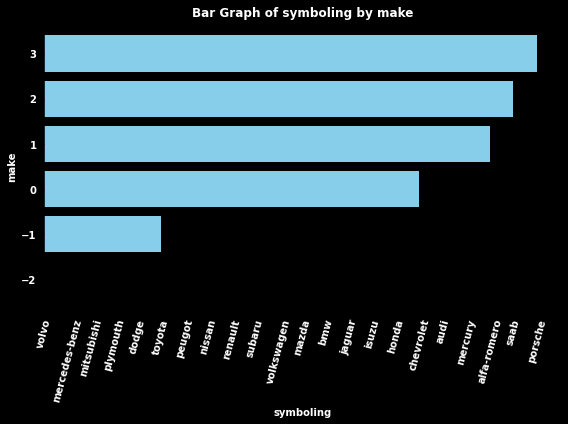

In [28]:
class Visuals:
     def __init__(self, df):
          self.df = df
          
     def Vizualize(self):
          import pandas as pd
          import matplotlib.pyplot as plt
          df_sorted = self.df.sort_values(by='symboling', ascending=True)
          plt.figure(figsize=(8,6))
          plt.barh(df_sorted['symboling'], df_sorted['make'], color='skyblue')

          # Add labels and title
          plt.xlabel('symboling',  weight = 'bold', color = 'white')
          plt.ylabel('make',  weight = 'bold', color = 'white')
          plt.title('Bar Graph of symboling by make',  weight = 'bold', color = 'white')
          plt.xticks(rotation = 75, weight = 'bold', color = 'white')
          plt.yticks( weight = 'bold', color = 'white')
          plt.gca().set_facecolor('black')  # Set axes (plot) background to black
          plt.gcf().set_facecolor('black')  # Set figure background to black

        # Display the plot
          plt.tight_layout()
          plt.show()

          # Display the plot
          plt.show()
          
df = pd.read_excel('Car.xlsx')
vis = Visuals(df)
vis.Vizualize()

# 

# Histogram

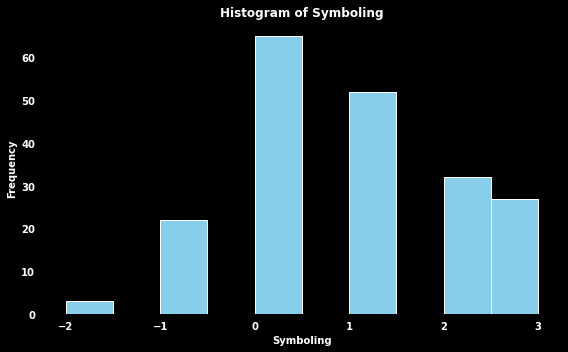

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

class Visuals:
    def __init__(self, df):
        self.df = df

    def Vizualize_histogram(self):
        # Plotting
        plt.figure(figsize=(8, 5))

        # Histogram for 'symboling'
        plt.hist(self.df['symboling'], bins=10, color='skyblue', edgecolor='white')

        # Add labels and title
        plt.xlabel('Symboling', weight='bold', color='white')
        plt.ylabel('Frequency', weight='bold', color='white')
        plt.title('Histogram of Symboling', weight='bold', color='white')

        # Customize the ticks colors
        plt.xticks(weight='bold', color='white')
        plt.yticks(weight='bold', color='white')

        # Set dark background for the figure and the axes
        plt.gca().set_facecolor('black')  # Axes background
        plt.gcf().set_facecolor('black')  # Figure background

        # Display the plot
        plt.tight_layout()
        plt.show()

# Load the data
df = pd.read_excel('Car.xlsx')

# Instantiate and visualize the histogram
vis = Visuals(df)
vis.Vizualize_histogram()


# Symboling and fuel_type

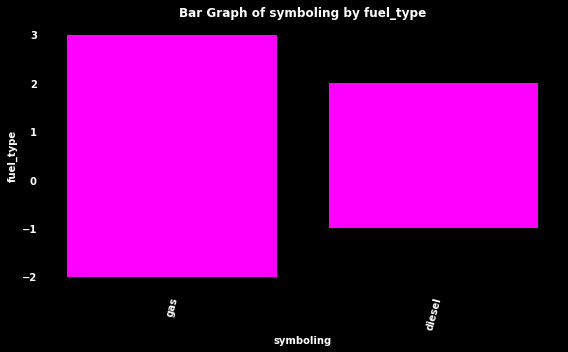

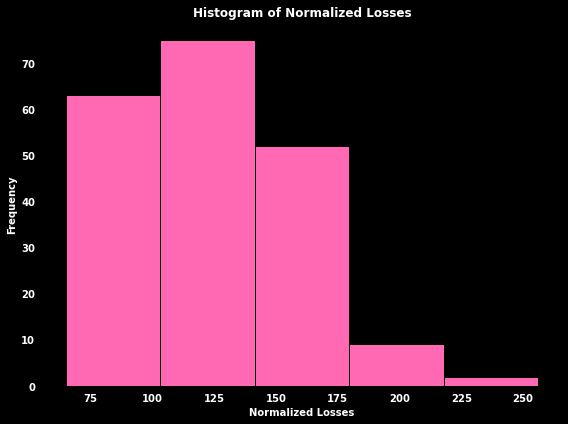

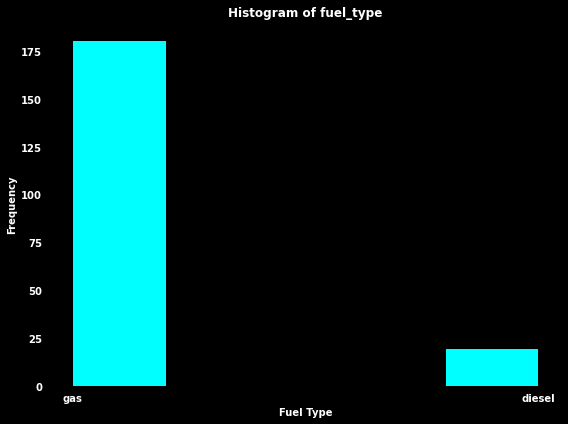

In [30]:
class Data_visualization:
     
     def __init__(self, data): 
        self.data = data
        
     def prepare_plot(self):
          import pandas as pd
          import matplotlib.pyplot as plt
          data_sorted = self.data.sort_values(by = 'symboling',ascending=True)
          plt.figure(figsize=(8, 5))
          plt.bar(data_sorted['fuel_type'], data_sorted['symboling'], color = '#FF00FF')
                    # Add labels and title
          plt.xlabel('symboling',  weight = 'bold', color = 'white')
          plt.ylabel('fuel_type',  weight = 'bold', color = 'white')
          plt.title('Bar Graph of symboling by fuel_type',  weight = 'bold', color = 'white')
          plt.xticks(rotation = 75, weight = 'bold', color = 'white')
          plt.yticks( weight = 'bold', color = 'white')
          plt.gca().set_facecolor('black')  # Set axes (plot) background to black
          plt.gcf().set_facecolor('black')  # Set figure background to black

        # Display the plot
          plt.tight_layout()
          plt.show()

          # Display the plot
          plt.show()
          
     def Hist(self):
       plt.figure(figsize=(8,6))
       plt.hist(self.data['normalized_losses'], bins=5, color='#FF69B4', edgecolor='black')
       plt.xlabel('Normalized Losses',  weight='bold', color='white')
       plt.ylabel('Frequency',  weight='bold', color='white')
       plt.title('Histogram of Normalized Losses',  weight='bold', color='white')
        # Customize the ticks colors
       plt.xticks(weight='bold', color='white')
       plt.yticks(weight='bold', color='white')

        # Set dark background for the figure and the axes
       plt.gca().set_facecolor('black')  # Axes background
       plt.gcf().set_facecolor('black')  # Figure background

        # Display the plot
       plt.tight_layout()
       plt.show()
       
     def Histogram(self):
       plt.figure(figsize=(8,6))
       plt.hist(self.data['fuel_type'], bins=5, color='#00FFFF', edgecolor='black')  
       plt.xlabel('Fuel Type',  weight='bold', color='white')
       plt.ylabel('Frequency',  weight='bold', color='white')
       plt.title("Histogram of fuel_type", weight = 'bold', color = 'white')
       plt.xticks(weight = 'bold', color = 'white')
       plt.yticks(weight = 'bold', color = 'white')
       plt.gca().set_facecolor('black')
       plt.gcf().set_facecolor('black')
       plt.tight_layout()
       plt.show()

      
       
          
data = pd.read_excel('Car.xlsx')
vis = Data_visualization(data)
vis.prepare_plot()
vis.Hist()
vis.Histogram()

# Chi square test for Categorical Data (Fuel Type, Price)

In [37]:
import pandas as pd

class Categorical:
    def __init__(self, df):
        """
        Initialize with a dataframe.
        :param df: The input dataframe containing all data.
        """
        self.df = df

    def Select_Cols(self):
        """
        Select the relevant columns 'fuel_type' and 'price' from the dataframe.
        :return: A new dataframe containing only 'fuel_type' and 'price' columns.
        """
        # Check if the required columns are in the dataframe
        required_cols = ['fuel_type', 'price']
        missing_cols = [col for col in required_cols if col not in self.df.columns]
        
        if missing_cols:
            raise ValueError(f"Missing columns in the dataset: {', '.join(missing_cols)}")

        # Select the relevant columns and return the dataframe
        return self.df[required_cols]

# Load the data from a CSV file
df = pd.read_csv(r"C:\Users\mk744\Downloads\Knowledge Box\documents\datafiles\Automobile+29.csv")

# Instantiate the Categorical class
cat = Categorical(df)

# Select relevant columns and print the result
selected_data = cat.Select_Cols()
print(selected_data)


    fuel_type  price
0         gas  13495
1         gas  16500
2         gas  16500
3         gas  13950
4         gas  17450
..        ...    ...
196       gas  16845
197       gas  19045
198       gas  21485
199    diesel  22470
200       gas  22625

[201 rows x 2 columns]


In [36]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy.stats import chi2_contingency

class Categorical:
    def __init__(self, df):
        """
        Initialize with the dataframe
        """
        self.df = df

    def Select_Cols(self):
        """
        Select the relevant columns 'fuel_type' and 'price' from the dataframe
        """
        selected_cols = ['fuel_type', 'price']
        
        # Check if the columns exist in the dataframe
        missing_cols = [col for col in selected_cols if col not in self.df.columns]
        if missing_cols:
            raise ValueError(f"Missing columns in the dataset: {', '.join(missing_cols)}")
        
        # Return the dataframe with selected columns
        self.df = self.df[selected_cols]
        return self.df
    
    def bin_price(self):
        """
        Bin the 'price' column into categories (Low, Medium, High)
        """
        # Check if 'price' column is present
        if 'price' not in self.df.columns:
            raise ValueError("Column 'price' is not in the dataframe")
        
        bins = [0, 10000, 20000, np.inf]  # Define price ranges
        labels = ['Low', 'Medium', 'High']
        
        # Bin the price data into categories
        self.df['price_category'] = pd.cut(self.df['price'], bins=bins, labels=labels)
        
    def chi_square_test(self):
        """
        Perform the Chi-Square test on fuel_type and price_category
        Returns the Chi-Square statistic, p-value, degrees of freedom, and expected frequencies
        """
        # Check if 'fuel_type' and 'price_category' are in the dataframe
        if 'fuel_type' not in self.df.columns or 'price_category' not in self.df.columns:
            raise ValueError("Columns 'fuel_type' or 'price_category' are missing in the dataframe")
        
        # Create a contingency table
        contingency_table = pd.crosstab(self.df['fuel_type'], self.df['price_category'])

        # Perform the Chi-Square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # Return the results as a dictionary
        results = {
            'Chi-Square Statistic': chi2,
            'p-value': p,
            'Degrees of Freedom': dof,
            'Expected Frequencies': expected
        }
        
        return results

# Load the data
df = pd.read_csv(r"C:\Users\mk744\Downloads\Knowledge Box\documents\datafiles\Automobile+29.csv")

# Instantiate the Categorical class
cat = Categorical(df)

# Select relevant columns (fuel_type and price)
selected_data = cat.Select_Cols()

# Bin the 'price' column into categories
cat.bin_price()

# Perform the Chi-Square test and store the result
chi_square_results = cat.chi_square_test()

# Display the results
for key, value in chi_square_results.items():
    print(f"{key}: \n{value}\n")


Chi-Square Statistic: 
4.640074112943095

p-value: 
0.09826994399950563

Degrees of Freedom: 
2

Expected Frequencies: 
[[ 9.75124378  7.76119403  2.48756219]
 [88.24875622 70.23880597 22.51243781]]



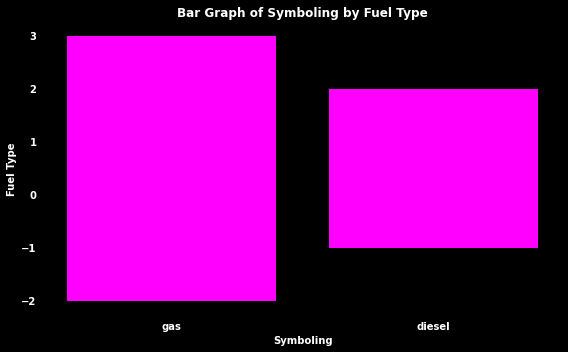

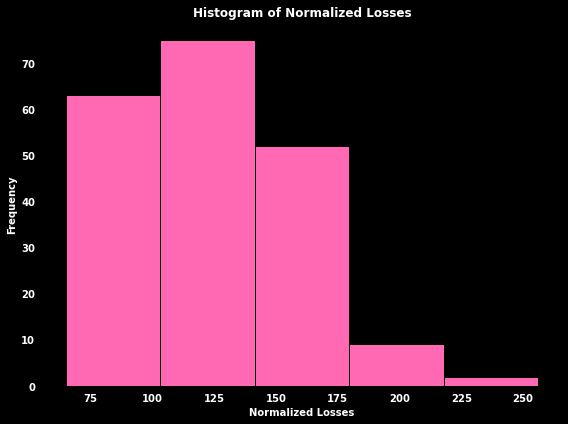

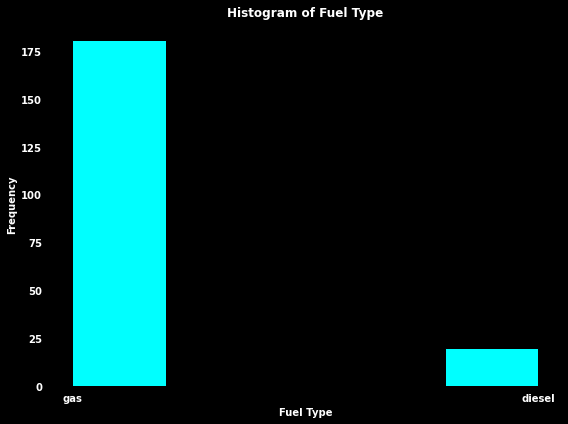

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

class DataVisualization:
    def __init__(self, data):
        """
        Initialize the DataVisualization class with a dataframe.
        :param data: Input dataframe for analysis and visualization.
        """
        self.data = data
        self.validate_data()  # Validate the input data when initializing the class

    def validate_data(self):
        """Ensure that necessary columns exist in the dataframe."""
        required_columns = ['symboling', 'fuel_type', 'normalized_losses']
        for col in required_columns:
            if col not in self.data.columns:
                raise ValueError(f"Missing required column: {col}")

    def set_dark_background(self):
        """Helper method to set a dark background for plots."""
        plt.gca().set_facecolor('black')  # Set axes (plot) background to black
        plt.gcf().set_facecolor('black')  # Set figure background to black
        plt.xticks(weight='bold', color='white')
        plt.yticks(weight='bold', color='white')

    def prepare_plot(self):
        """Create a bar plot of 'symboling' by 'fuel_type'."""
        data_sorted = self.data.sort_values(by='symboling', ascending=True)

        # Plotting
        plt.figure(figsize=(8, 5))
        plt.bar(data_sorted['fuel_type'], data_sorted['symboling'], color='#FF00FF')

        # Add labels and title
        plt.xlabel('Symboling', weight='bold', color='white')
        plt.ylabel('Fuel Type', weight='bold', color='white')
        plt.title('Bar Graph of Symboling by Fuel Type', weight='bold', color='white')

        # Set dark background
        self.set_dark_background()

        # Display the plot
        plt.tight_layout()
        plt.show()

    def plot_hist_normalized_losses(self):
        """Plot a histogram of 'normalized_losses'."""
        plt.figure(figsize=(8, 6))
        plt.hist(self.data['normalized_losses'].dropna(), bins=5, color='#FF69B4', edgecolor='black')

        # Add labels and title
        plt.xlabel('Normalized Losses', weight='bold', color='white')
        plt.ylabel('Frequency', weight='bold', color='white')
        plt.title('Histogram of Normalized Losses', weight='bold', color='white')

        # Set dark background
        self.set_dark_background()

        # Display the plot
        plt.tight_layout()
        plt.show()

    def plot_hist_fuel_type(self):
        """Plot a histogram of 'fuel_type'."""
        plt.figure(figsize=(8, 6))
        plt.hist(self.data['fuel_type'], bins=5, color='#00FFFF', edgecolor='black')

        # Add labels and title
        plt.xlabel('Fuel Type', weight='bold', color='white')
        plt.ylabel('Frequency', weight='bold', color='white')
        plt.title("Histogram of Fuel Type", weight='bold', color='white')

        # Set dark background
        self.set_dark_background()

        # Display the plot
        plt.tight_layout()
        plt.show()

# Load the data from Excel file
data = pd.read_excel('Car.xlsx')

# Instantiate the DataVisualization class
vis = DataVisualization(data)

# Call methods to visualize the data
vis.prepare_plot()
vis.plot_hist_normalized_losses()
vis.plot_hist_fuel_type()


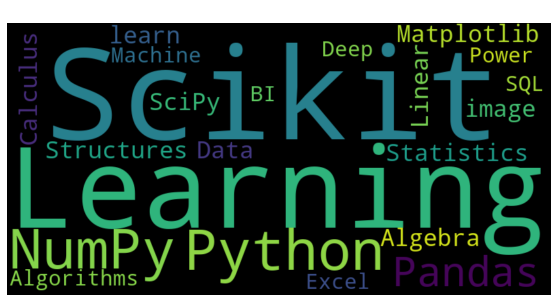

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

class DynamicWordCloud:
    def __init__(self, text, output_image='wordcloud.png'):
        self.text = text
        self.output_image = output_image

    def generate_word_cloud(self):
        """
        Generate a word cloud from the input text and save it as an image file.
        """
        # Create a word cloud object
        wordcloud = WordCloud(width=800, height=400, 
                              background_color='black', 
                              colormap='viridis', 
                              contour_color='white',
                              contour_width=1).generate(self.text)
        
        # Display the word cloud using matplotlib
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')  # Hide the axis
        plt.title('', color='white')

        # Save the word cloud image to a file
        plt.savefig(self.output_image, format='png', bbox_inches='tight', pad_inches=0)
        plt.show()

# Example text
text = """
Python NumPy Pandas Matplotlib Scikit-learn Scikit-image SciPy Linear Algebra 
Calculus Statistics Data Structures and Algorithms Machine Learning Deep Learning 
SQL Power BI Excel
"""

# Create an instance of DynamicWordCloud
wordcloud_generator = DynamicWordCloud(text, 'dynamic_wordcloud.png')

# Generate and save the word cloud
wordcloud_generator.generate_word_cloud()
